Here's how the night sky surface brightness continuum varies over the course of $\sim7$ hours

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

## sky brightness variation during dark night 
First is on a night with relatively low moon illumination and with the moon below the horizon (i.e. dark time) 

/Users/chang/anaconda2/lib/python2.7/site-packages/feasibgs/skymodel.py:269: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  coeffs = pd.DataFrame.from_csv(f)


---- at 11 oclock ----
target alt=53.725619
airmass=1.240398
sun alt=-38.949215
sun sep=109.360706
moon alt=-59.067672
moon sep=15.064429
moon ill=0.135083
---- at 0 oclock ----
target alt=57.829496
airmass=1.181380
sun alt=-42.689466
sun sep=109.358314
moon alt=-50.251587
moon sep=15.083437
moon ill=0.132345
---- at 1 oclock ----
target alt=55.964048
airmass=1.206729
sun alt=-42.210839
sun sep=109.355921
moon alt=-39.381551
moon sep=15.102518
moon ill=0.129630
---- at 2 oclock ----
target alt=48.944055
airmass=1.326139
sun alt=-37.629920
sun sep=109.353528
moon alt=-27.557756
moon sep=15.121673
moon ill=0.126937


(0.0, 10.0)

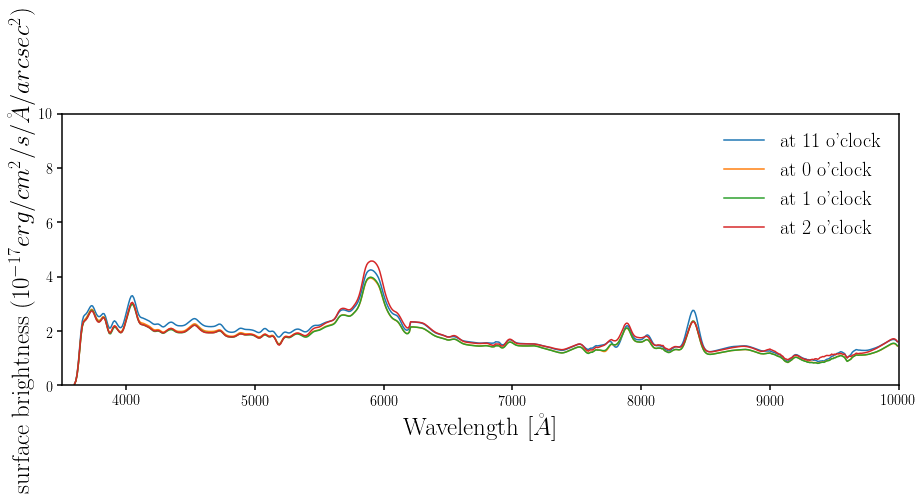

In [3]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
for hour in range(4, 12): 
    obs_time = datetime(2019, 5, 1, hour, 0, 0)
    skysp = Sky.skySpec(215., 0., obs_time)
    if skysp.X < 1.4: 
        print('---- at %i oclock ----' % (((hour - 7) % 24) % 12))
        print('target alt=%f' % skysp.objalt)
        print('airmass=%f' % skysp.X)
        print('sun alt=%f' % skysp.alpha)
        print('sun sep=%f' % skysp.delta)
        print('moon alt=%f' % skysp.altm)    
        print('moon sep=%f' % skysp.delm)    
        print('moon ill=%f' % skysp.illm)
        w, Icont = skysp.get_Icontinuum()
        sub.plot(w, Icont, label='at '+str((((hour - 7) % 24) % 12))+" o'clock")
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.e4])
sub.set_ylabel(r"surface brightness ($10^{-17} erg/cm^{2}/s/\AA/arcsec^2$)", fontsize=25)
sub.set_ylim([0., 10.])

## sky brightness variation during bright night 
Next is on a night with high moon illumination and high altitude 
$$(\mathrm{moon\,illumination}) \times (\mathrm{moon\,altitude}) > 30.$$

(moon alt) x (moon ill) < 30
(moon alt) x (moon ill) < 30
(moon alt) x (moon ill) < 30
(moon alt) x (moon ill) < 30
---- at 1 oclock ----
target alt=49.428188
airmass=1.316497
sun alt=-56.474095
sun sep=111.598399
moon alt=43.258024
moon sep=33.370952
moon ill=0.927209
---- at 2 oclock ----
target alt=56.219559
airmass=1.203117
sun alt=-51.175541
sun sep=111.596003
moon alt=48.198751
moon sep=33.332295
moon ill=0.924725
---- at 3 oclock ----
target alt=57.752354
airmass=1.182383
sun alt=-42.127573
sun sep=111.593608
moon alt=48.734676
moon sep=33.293654
moon ill=0.922205
---- at 4 oclock ----
target alt=53.352115
airmass=1.246387
sun alt=-31.074170
sun sep=111.591212
moon alt=44.700283
moon sep=33.255029
moon ill=0.919650


(0.0, 100.0)

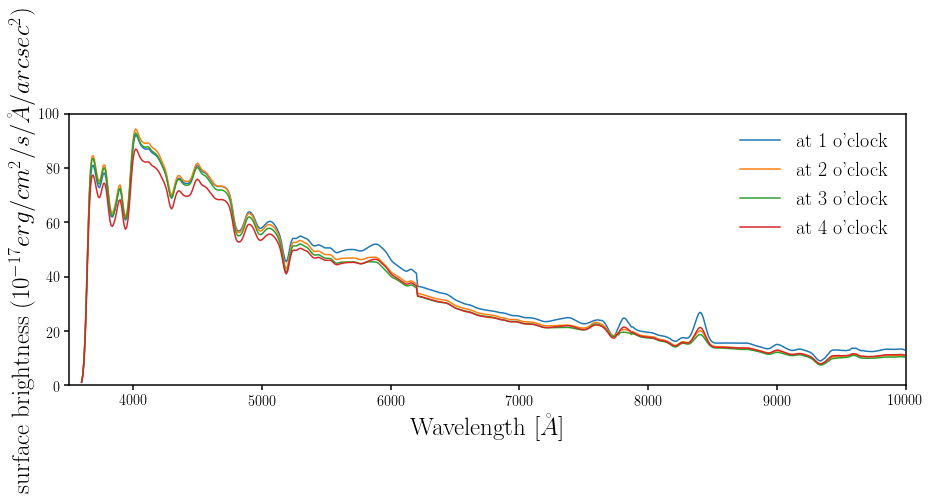

In [19]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
for hour in range(4, 12): 
    obs_time = datetime(2019, 3, 23, hour, 0, 0)
    try: 
        skysp = Sky.skySpec(215., 0., obs_time)
        if ((skysp.altm * skysp.illm).value > 30.) and (skysp.X < 1.4): 
            print('---- at %i oclock ----' % (((hour - 7) % 24) % 12))
            print('target alt=%f' % skysp.objalt)
            print('airmass=%f' % skysp.X)
            print('sun alt=%f' % skysp.alpha)
            print('sun sep=%f' % skysp.delta)
            print('moon alt=%f' % skysp.altm)    
            print('moon sep=%f' % skysp.delm)    
            print('moon ill=%f' % skysp.illm)
            w, Icont = skysp.get_Icontinuum()
            sub.plot(w, Icont, label='at '+str((((hour - 7) % 24) % 12))+" o'clock")
        else: 
            print('(moon alt) x (moon ill) < 30')
    except: 
        pass
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.e4])
sub.set_ylabel(r"surface brightness ($10^{-17} erg/cm^{2}/s/\AA/arcsec^2$)", fontsize=25)
sub.set_ylim([0., 100.])